## Random forest
is a type of supervised machine learning algorithm based on ensemble learning. Ensemble learning is a type of learning where you join different types of algorithms or same algorithm multiple times to form a more powerful prediction model. The random forest algorithm combines multiple algorithm of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest". The random forest algorithm can be used for both regression and classification tasks.

#### How the Random Forest Algorithm Works

1. Pick N random records from the dataset.
2. Build a decision tree based on these N records.
3. Choose the number of trees you want in your algorithm and repeat steps 1 and 2.
4. In case of a regression problem, for a new record, each tree in the forest predicts a value for Y (output). The final value can be calculated by taking the average of all the values predicted by all the trees in forest. Or, in case of a classification problem, each tree in the forest predicts the category to which the new record belongs. Finally, the new record is assigned to the category that wins the majority vote.



* This algorithm is very stable. Even if a new data point is introduced in the dataset the overall algorithm is not affected much since new data may impact one tree, but it is very hard for it to impact all the trees.
* The random forest algorithm works well when you have both categorical and numerical features.
* The random forest algorithm also works well when data has missing values or it has not been scaled well (although we have performed feature scaling in this article just for the purpose of demonstration).

* A major disadvantage of random forests lies in their complexity. They required much more computational resources, owing to the large number of decision trees joined together.Due to their complexity, they require much more time to train than other comparable algorithms.

The problem here is to predict the gas consumption (in millions of gallons) in 48 of the US states based on petrol tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with the driving license.

In [10]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('petrol_consumption.csv')
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


Dataset is not yet a scaled value, for instance the Average_Income field has values in the range of thousands while Petrol_tax has values in range of tens. 

In [11]:
# divide data into 'attributes' and 'label' sets
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

# divide the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

The RandomForestRegressor class of the sklearn.ensemble library is used to solve regression problems via random forest. The most important parameter of the RandomForestRegressor class is the n_estimators parameter. This parameter defines the number of trees in the random forest. 

In [14]:
# Evaluating the Algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 51.76500000000001
Mean Squared Error: 4216.166749999999
Root Mean Squared Error: 64.93201637097064


In [17]:
from sklearn.ensemble import RandomForestRegressor

regressorr = RandomForestRegressor(n_estimators=200, random_state=0)
regressorr.fit(X_train, y_train)
y_predd = regressorr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predd))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predd))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predd)))

Mean Absolute Error: 48.33899999999999
Mean Squared Error: 3494.2330150000003
Root Mean Squared Error: 59.112037818028234


## A Random Forest 
is an ensemble technique capable of performing both **regression** and **classification** tasks with the use of multiple decision trees and a technique called **Bootstrap** and **Aggregation**, commonly known as **bagging**. The basic idea behind this is to **combine multiple decision trees** in determining the final output rather than relying on individual decision trees.Random Forest has multiple decision trees as base learning models. We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called Bootstrap.


In [20]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
data = pd.read_csv('Position_Salaries.csv') 
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [23]:
x = data.iloc[:, 1:2].values  #Level
y = data.iloc[:, 2].values    #Salary

# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
# fit the regressor with x and y data 
regressor.fit(x, y) 
Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1)) # test the output by changing values 



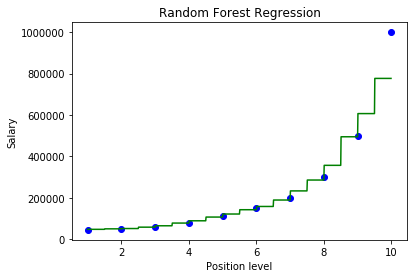

In [25]:
# Visualising the Random Forest Regression results 

# arange for creating a range of values 
# from min value of x to max 
# value of x with a difference of 0.01 
# between two consecutive values 
X_grid = np.arange(min(x), max(x), 0.01) 

# reshape for reshaping the data into a len(X_grid)*1 array, 
X_grid = X_grid.reshape((len(X_grid), 1)) 

# Scatter plot for original data 
plt.scatter(x, y, color = 'blue') 

# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid), color = 'green') 
plt.title('Random Forest Regression') 
plt.xlabel('Position level') 
plt.ylabel('Salary') 
plt.show()


Your seat in 7.8 level, price is :  [20.85]


C:\Users\Recep\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


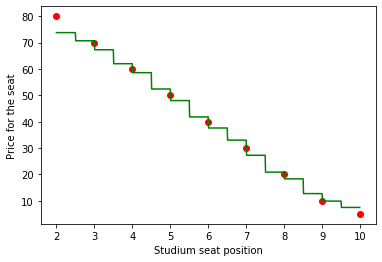

In [16]:
#%% Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#%%Load the dataset
df=pd.read_csv("random_forest_regression_dataset.csv",sep=",")
# In a football studium, position(x) and price(y) dataset.
x=df.iloc[:,0].values.reshape(-1,1)   #numpy array, 0. index in dataframe
y=df.iloc[:,1].values.reshape(-1,1)


#%% Decision Tree Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor( n_estimators=100,random_state=42 ) 
# estimators = number of trees 
# random_state = number of samples, we define the number to not have 
# problem in our other predictions ( random = default )
rf.fit(x,y)
print("Your seat in 7.8 level, price is : ", rf.predict([[7.8]]))

x_= np.arange(min(x), max(x), 0.01).reshape(-1,1)
y_head=rf.predict(x_)

#%% Visualize
plt.scatter(x,y,color="red")

plt.plot(x_,y_head,color="green")
plt.xlabel("Studium seat position")
plt.ylabel("Price for the seat")
#it uses 100 trees.

plt.show()
